**ScratchLinearRegression雛形**

In [891]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = np.array(X)
        X_val = np.array(X_val)
        y = np.array(y)
        y_val = np.array(y_val)
        y = y.flatten()
        y_val = y_val.flatten()
        
        n_features = X.shape[1]
        if self.bias == True:
            self.w = np.random.random_sample(n_features)
        else:
            self.w = np.random.random_sample(n_features+1)
        for iter in range(self.iter):
            pred = self._linear_hypothesis(X)
            pred_val = self._linear_hypothesis(X_val)
            error = y - pred
            error_val = y_val - pred_val
            self.w = self._gradient_descent(X, error)
            self.loss[iter] = sum(((error**2)/2))/X.shape[0]
            self.val_loss[iter] = sum(((error_val**2)/2))/X_val.shape[0]
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("loss:{:.3f} val_loss:{:.3f}".format(sum(((error**2)/2))/X.shape[0],sum(((error_val**2)/2))/X_val.shape[0]))
        return self

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.bias == True:
            predict = np.dot(self.w, X.T)
        else:
            predict = np.dot(self.w[1:], X.T) + self.w[0]
        
        return predict
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        if self.bias == True:
            pred = np.dot(self.w, X.T)
        else:
            pred = np.dot(self.w[1:], X.T) + self.w[0]
        return pred

    def _gradient_descent(self, X, error):
        """
        重みを更新する
        
        parameters
        ------------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        
        error : float
          ターゲットと予測値の差
        
        Returns
        -------
          重みとバイアスのこ更新データ
        """
        
        if self.bias == False:
            self.w[1:] += self.lr * np.dot(error, X)
            self.w[0] += self.lr * error.sum()
        else:
            self.w += self.lr * np.dot(error, X)
        return self.w

# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

上記ScratchLinearRegression雛形に記載

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

上記ScratchLinearRegression雛形に記載

# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数の出力が推定結果です。

上記ScratchLinearRegression雛形に記載

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

In [874]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum((y - y_pred)**2) / len(y)
    return mse

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） 
J
(
θ
)
 は次の式です。

上記ScratchLinearRegression雛形に記載

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [398]:
cd ..

/Users/niikurasayaka/diveintocode-ml/Week3


In [401]:
cd data

/Users/niikurasayaka/diveintocode-ml/Week3/data


In [512]:
import pandas as pd
df = pd.read_csv("train.csv")

In [513]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

可視化できるように特徴量一つで学習してみる。

In [892]:
from sklearn.model_selection import train_test_split
train_x = df[["GrLivArea"]]
train_y = df["SalePrice"]
tr_x, te_x, tr_y, te_y = train_test_split(train_x, train_y, random_state=1)

SalePriceを対数化

In [893]:
tr_y = np.array(tr_y)
te_y = np.array(te_y)
tr_y = np.log10(tr_y)
te_y = np.log10(te_y)

標準化

In [894]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
tr_x = scx.fit_transform(tr_x)
te_x = scx.transform(te_x)

In [895]:
tr_x

array([[ 0.32320933],
       [ 0.1004104 ],
       [ 0.82167474],
       ...,
       [-0.31686557],
       [-1.01169614],
       [-1.18729191]])

In [896]:
slr = ScratchLinearRegression(num_iter=3000, lr=0.0001, bias=False, verbose=False)

In [897]:
slr.fit(tr_x, tr_y, te_x, te_y)

In [898]:
slr.predict(tr_x)

array([5.26443293, 5.23806599, 5.32342338, ..., 5.18868383, 5.10645472,
       5.08567399])

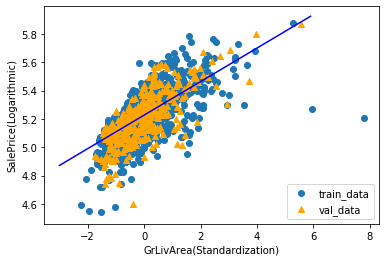

In [899]:
import matplotlib.pyplot as plt
x = np.arange(-3, 6, 0.1).reshape(-1, 1)
plt.scatter(tr_x, tr_y, label="train_data")
plt.scatter(te_x, te_y, marker="^", color="orange", label="val_data")
plt.plot(x, slr.predict(x), color="b")
plt.legend(loc='lower right')
plt.xlabel("GrLivArea(Standardization)")
plt.ylabel('SalePrice(Logarithmic)')
plt.show()

# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [900]:
los_tr = slr.loss
los_val = slr.val_loss
x = np.arange(1, slr.iter+1)

In [901]:
len(los_tr)

3000

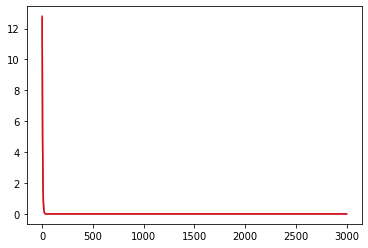

In [902]:
plt.plot(x, los_tr)
plt.plot(x, los_val, color="r")

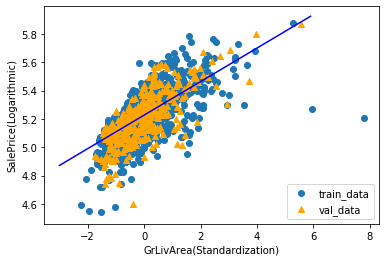

In [903]:
x = np.arange(-3, 6, 0.1).reshape(-1, 1)
plt.scatter(tr_x, tr_y, label="train_data")
plt.scatter(te_x, te_y, marker="^", color="orange", label="val_data")
plt.plot(x, slr.predict(x), color="b")
plt.legend(loc='lower right')
plt.xlabel("GrLivArea(Standardization)")
plt.ylabel('SalePrice(Logarithmic)')
plt.show()

# 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [851]:
slr = ScratchLinearRegression(num_iter=3000, lr=0.0001, bias=True, verbose=False)

In [852]:
slr.fit(tr_x, tr_y, te_x, te_y)

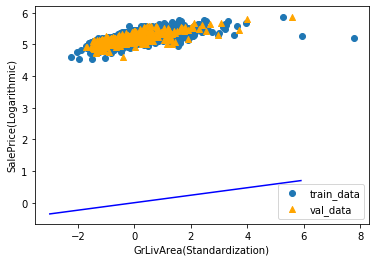

In [854]:
x = np.arange(-3, 6, 0.1).reshape(-1, 1)
plt.scatter(tr_x, tr_y, label="train_data")
plt.scatter(te_x, te_y, marker="^", color="orange", label="val_data")
plt.plot(x, slr.predict(x), color="b")
plt.legend(loc='lower right')
plt.xlabel("GrLivArea(Standardization)")
plt.ylabel('SalePrice(Logarithmic)')
plt.show()

bias項を除くと必ず原点を通るようになるため学習がうまくいかなくなる。

# 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [867]:
train_x2 = df[["GrLivArea"]]**2
train_y2 = df["SalePrice"]

In [868]:
slr = ScratchLinearRegression(num_iter=3000, lr=0.0001, bias=False, verbose=False)

In [869]:
tr_x, te_x, tr_y, te_y = train_test_split(train_x2, train_y2, random_state=1)

In [870]:
tr_y = np.array(tr_y)
te_y = np.array(te_y)
tr_y = np.log10(tr_y)
te_y = np.log10(te_y)
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
tr_x = scx.fit_transform(tr_x)
te_x = scx.transform(te_x)

In [871]:
slr.fit(tr_x, tr_y, te_x, te_y)

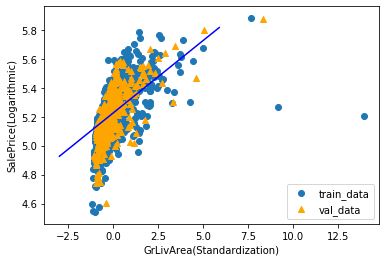

In [872]:
x = np.arange(-3, 6, 0.1).reshape(-1, 1)
plt.scatter(tr_x, tr_y, label="train_data")
plt.scatter(te_x, te_y, marker="^", color="orange", label="val_data")
plt.plot(x, slr.predict(x), color="b")
plt.legend(loc='lower right')
plt.xlabel("GrLivArea(Standardization)")
plt.ylabel('SalePrice(Logarithmic)')
plt.show()

# 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
θ
j
:=
θ
j
−
α
1
m
m
∑
i
=
1
 
[
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
]
以下の式から説明をはじめることができます。

θ
j
:=
θ
j
−
∂
∂
θ
j
J
(
θ
)
目的関数（損失関数） 
J
(
θ
)
 は次の式です。

J
(
θ
)
=
1
2
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.

$$
J(θ) = \frac{1}{2m}\sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})^2
$$
$$
f(g(x))
$$
の微分は
$$
f'(g(x))g'(x)
$$
なので
$$
J'(θ) = \frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})x_j^{(i)}
$$
これに学習率をかけたものを重みに足して更新する。
$$
θ_j := θ_j - α\frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})x_j^{(i)}
$$

# 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

(回答)\
最適解＝コスト関数を最小化する。　線形回帰のコスト関数は二次関数で凸部分が１箇所しかないので学習を続ければ必ずその凸部分におさまる。

$$
J(θ) = \frac{1}{2m}\sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})^2
$$